In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [2]:
head = dataset.head() # First 5 line
print("head",head)
tail = dataset.tail() # Last 5 line
print("tail",tail)
describe = dataset.describe() #summary statistics for numerical columns
print("describe",describe)
info = dataset.info() #index, datatype and memory information
print("info",info)
max = dataset.max() # Returns the highest value in each column
print("max",max)
min = dataset.min() # Returns the lowest value in each column
print("min",min)
median = dataset.median() # Returns the medians value in each column
print("median",median)

head    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
tail      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83
describe        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.

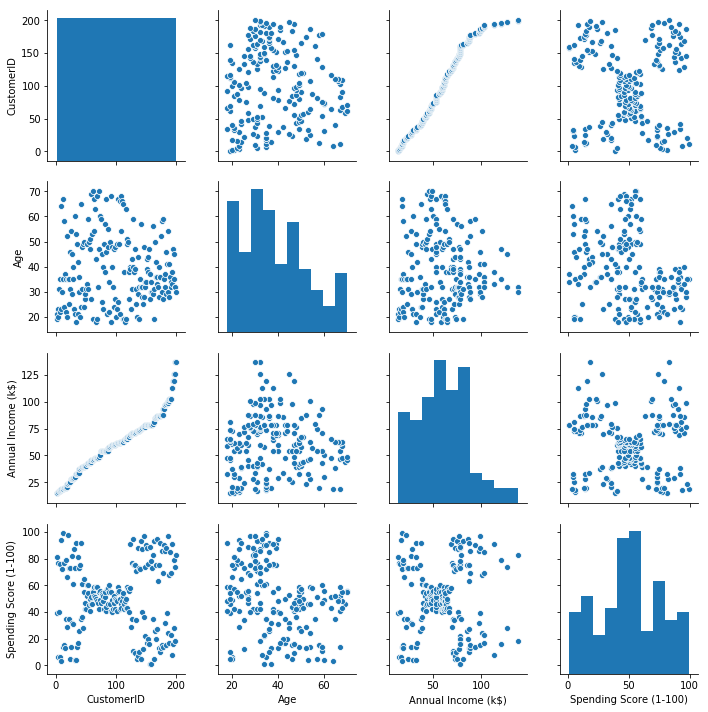

In [3]:
sns.pairplot(dataset)

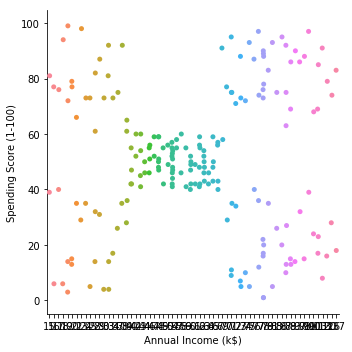

In [4]:
sns.catplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataset)

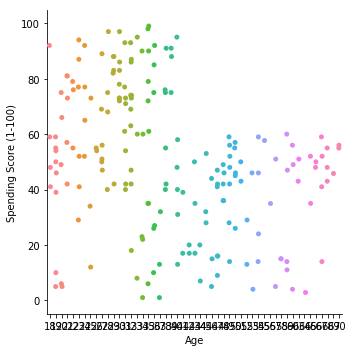

In [5]:
sns.catplot(x="Age", y="Spending Score (1-100)", data=dataset)

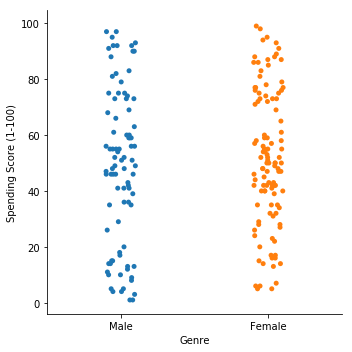

In [6]:
sns.catplot(x="Genre", y="Spending Score (1-100)", data=dataset)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]

for col in columns:
    X = dataset.iloc[:, [2,3]].values
    y = dataset.iloc[:, 4].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
    reg = DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    print('Score for {} as dependent variable is {}'.format(col,reg.score(X_test,y_test)))

Score for Age as dependent variable is -0.4545890442125795
Score for Annual Income (k$) as dependent variable is -0.4614485513196401
Score for Spending Score (1-100) as dependent variable is -0.4544871703446529


In [8]:
##########            PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(dataset.iloc[:, [2,3,4]].values)
pca.explained_variance_ratio_

array([0.45125272, 0.44098465, 0.10776263])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [10]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [11]:
# Sum of explained variances of the first two components is 89%
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.8922373735506914

In [12]:
print(pca.components_)

[[-0.1889742   0.58864102  0.7859965 ]
 [ 0.1309652   0.80837573 -0.57391358]
 [ 0.97320957  0.00551667  0.22985365]]


In [13]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(pca.components_,columns=["Age","Annual Income(k$)","Spending Score (1-100)"])
components.index = dimensions

variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dimensions

pd.concat([variance,components], axis=1)

,Explained Variance,Age,Annual Income(k$),Spending Score (1-100)
Dimension 1,0.451253,-0.188974,0.588641,0.785997
Dimension 2,0.440985,0.130965,0.808376,-0.573914
Dimension 3,0.107763,0.973210,0.005517,0.229854


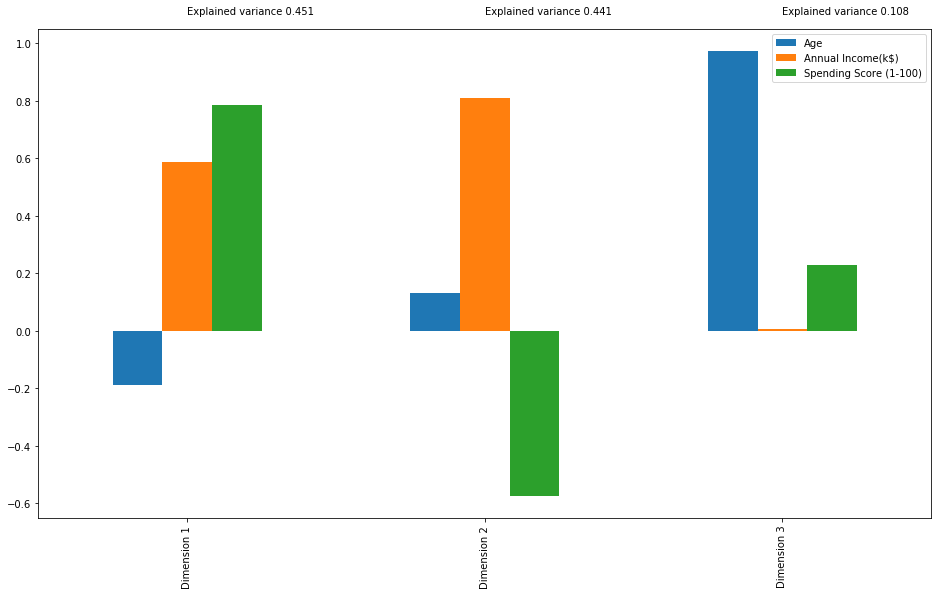

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
components.plot(kind='bar', ax=ax)
ax.set_xticklabels(dimensions)
for i,variance in enumerate(pca.explained_variance_ratio_):
    ax.text(i,ax.get_ylim()[1]+0.05,'Explained variance {}'.format(np.round(variance,3)))
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataset.iloc[:, [2,3,4]].values)
pca.explained_variance_ratio_

array([0.45125272, 0.44098465])

In [16]:
transformed_data = pca.transform(dataset.iloc[:, [2,3,4]].values)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2'])
transformed_data.head()

,Dimension 1,Dimension 2
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005


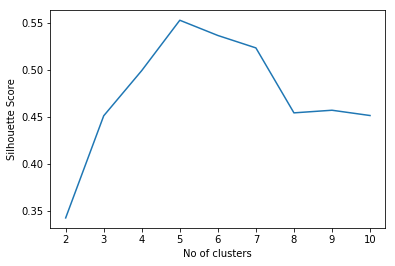

In [17]:
# Use silhouette score to find the ideal number of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

no_of_clusters= range(2,11)
kmeans = [KMeans(n_clusters=i) for i in no_of_clusters]
score = [silhouette_score(transformed_data,kmeans[i].fit(transformed_data).predict(transformed_data),metric='euclidean') for i in range(len(kmeans))]
plt.plot(no_of_clusters,score)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.show()

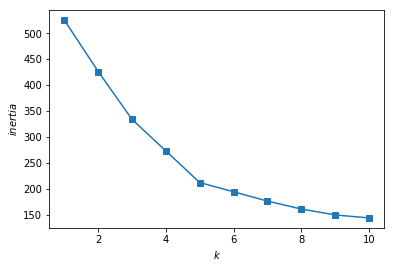

In [18]:
# Use elbow method to find the ideal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(transformed_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$inertia$');

In [19]:
model = KMeans(n_clusters=5)
model.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Prediction on the entire data
all_predictions = model.predict(transformed_data)
print(all_predictions)
print(dataset.iloc[:, [2,3,4]].values)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  3

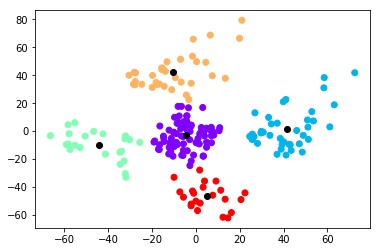

In [21]:
plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.show()

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
dataset.pop('Genre').values

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


In [23]:
varieties = dataset.pop('Spending Score (1-100)').values
print(varieties.shape)

(200,)


In [24]:
samples = dataset.values
print(samples.shape)

(200, 3)


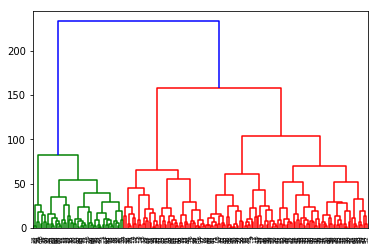

In [25]:
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()